# Question 1

In [122]:
import numpy as np
import struct
import time
import matplotlib.pyplot as plt

In [124]:
og = 100.98763

bit32 = np.float(og)

# 'f' is the format for 32-bit float, 'I' is for unsigned int
binary_rep = ''.join(f'{c:08b}' for c in struct.pack('>f', bit32))

# print(binary_rep)

# Binary back to float
float_again = struct.unpack('>f', struct.pack('>I', int(binary_rep, 2)))[0]

# print(float_again)

difference = og - float_again

# print (difference)


print(f"Original number: {og}")
print(f"32-bit float number: {bit32}")
print(f"Binary representation: {binary_rep}")
print(f"32 bit float number after reconverting the binary: {float_again}")
print(f"Difference: {difference}")


Original number: 100.98763
32-bit float number: 100.98763
Binary representation: 01000010110010011111100110101011
32 bit float number after reconverting the binary: 100.98763275146484
Difference: -2.7514648479609605e-06


<ipython-input-124-f20b8b484fe9>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bit32 = np.float(og)


Note: np when i subtracted bit32 from the original number i got 0.0 as output

# Question 2

In [7]:
# theoretical numbers

print(np.finfo(np.float32()))

print(np.finfo(np.float64()))

Machine parameters for float32
---------------------------------------------------------------
precision =   6   resolution = 1.0000000e-06
machep =    -23   eps =        1.1920929e-07
negep =     -24   epsneg =     5.9604645e-08
minexp =   -126   tiny =       1.1754944e-38
maxexp =    128   max =        3.4028235e+38
nexp =        8   min =        -max
smallest_normal = 1.1754944e-38   smallest_subnormal = 1.4012985e-45
---------------------------------------------------------------

Machine parameters for float64
---------------------------------------------------------------
precision =  15   resolution = 1.0000000000000001e-15
machep =    -52   eps =        2.2204460492503131e-16
negep =     -53   epsneg =     1.1102230246251565e-16
minexp =  -1022   tiny =       2.2250738585072014e-308
maxexp =   1024   max =        1.7976931348623157e+308
nexp =       11   min =        -max
smallest_normal = 2.2250738585072014e-308   smallest_subnormal = 4.9406564584124654e-324
------------------

In [8]:
smallest_float = np.float32(np.float32(2**(-126))*np.float32(2**(-23)))

np.set_printoptions(suppress= True ,precision= 50)

print(f"{smallest_float:.68f}")



0.00000000000000000000000000000000000000000000140129846432481707092373


In [9]:

# Precision Test (largest value added to 1 such that result is different from 1)
def find_epsilon(dtype):
    epsilon = dtype(1)
    while dtype(1) + epsilon != dtype(1):
        epsilon /= dtype(2) # divided by 2 since thats the binary value each digit is incremented by
    return epsilon * 2  # The last epsilon before the sum becomes equal to 1

# Finding epsilon for 32-bit and 64-bit floats
epsilon_32 = find_epsilon(np.float32)
epsilon_64 = find_epsilon(np.float64)

# Displaying results
print("Precision Test:")
print(f"Smallest epsilon for np.float32: {epsilon_32}")
print(f"Smallest epsilon for np.float64: {epsilon_64}")



Precision Test:
Smallest epsilon for np.float32: 1.1920928955078125e-07
Smallest epsilon for np.float64: 2.220446049250313e-16


In [10]:
# Start with a large number and keep multiplying by 2 until overflow (approx inf)
# make sure everything is calculated in 32 bits and 64 bits respectively
print("Dynamic range test")

large_32 = np.float32(1e30)
large_64 = np.float64(1e30)


while not np.isinf(np.float64(large_64)): #the function checks if the value in the bracket is infinity
    max_64 = np.float64(large_64) # To store the value before it becomes inf
    large_64 *= 2

while not np.isinf(np.float32(large_32)): #the function checks if the value in the bracket is infinity
    max_32 = np.float32(large_32) # To store the value before it becomes inf
    large_32 *= 2


print(f"Maximum for np.float32: {max_32}")
print(f"Maximum for np.float64: {max_64}")
print(f"Minimum for np.float32: {-max_32}")
print(f"Minimum for np.float64: {-max_64}")


# Start with a small number and keep dividing by 2 until underflow (approx 0)
small_32 = np.float32(1e-30)
small_64 = np.float64(1e-30)

while np.float32(np.float32(small_32)) > 0:
    smallest_32 = np.float32(small_32)
    small_32 /= 2
    
while np.float64(np.float64(small_64)) > 0:
    smallest_64 = np.float64(small_64)
    small_64 /= 2

print(f"Smallest normal for np.float32: {smallest_32}")
print(f"Smallest normal for np.float64: {smallest_64}")

Dynamic range test
Maximum for np.float32: 2.6843546003927346e+38
Maximum for np.float64: 1.418129833677085e+308
Minimum for np.float32: -2.6843546003927346e+38
Minimum for np.float64: -1.418129833677085e+308
Smallest normal for np.float32: 1.401298464324817e-45
Smallest normal for np.float64: 5e-324


<ipython-input-10-9ec98358eb40>:11: RuntimeWarning: overflow encountered in double_scalars
  large_64 *= 2


# Question 3 For Loops


In [9]:
# Madelung constant derrivation while keeping all other constants 1
start = time.time()

L = 100 # the number of atoms on each side

M = 0

i = 0
j = 0
k = 0



for i in range(-L, L+1):
    for j in range(-L, L+1):
        for k in range(-L,L+1):
            if i== j == k == 0:
                continue   
            M += ((-1)**abs(i+j+k))/np.sqrt((i**2)+(j**2)+(k**2))
            
            
print(M)
end = time.time()

print(f'Time taken = {end-start}')

            
    


-1.7418198158396654
Time taken = 33.772305965423584


# Question 3 without for Loops 

In [28]:
start2 = time.time()
L = 100  # Number of atoms on each side

# Create arrays of i, j, and k values ranging from -L to L excluding 0
i_vals = np.arange(-L, L + 1)
j_vals = np.arange(-L, L + 1)
k_vals = np.arange(-L, L + 1)



# Use meshgrid to create 3D grids for i, j, k values
i_grid, j_grid, k_grid = np.meshgrid(i_vals, j_vals, k_vals, indexing='ij')

# Calculate the squared distance for each point (i^2 + j^2 + k^2)
dist_sq = np.float64(i_grid**2 + j_grid**2 + k_grid**2)

# Calculate the alternating sign (-1)^(i + j + k)
signs = (-1)**abs(i_grid + j_grid + k_grid)

# Create a mask to exclude the (0, 0, 0) point
mask = (i_grid == 0) & (j_grid == 0) & (k_grid == 0)

# Remove the zero distance points from the calculation (set dist_sq to avoid division by zero)
dist_sq[mask] = np.inf  # Set the value to inf so that value becomes 0 and isnt added to the sum

result = signs / np.sqrt(dist_sq)

# Sum all the values in the result array to get M
M = np.sum(result)

end2 = time.time() 
print(M)
print(f'Time taken = {end2-start2}')


-1.7418198158362388
Time taken = 0.32591700553894043


# Question 4


In [86]:
# del j
N = 50 #NxN grid
iteration = 100

x = np.linspace(-2, 2, N)
y = np.linspace(-2, 2, N)


x_grid, y_grid = np.meshgrid(x, y, indexing='xy')

c_grid = x_grid + y_grid*1j

z = c_grid
  


for i in range(iteration):
    z_p = z**2 + c_grid
    z = z_p
    
ugh = (abs(z)<=2)


<ipython-input-86-9c911200c071>:18: RuntimeWarning: overflow encountered in square
  z_p = z**2 + c_grid
<ipython-input-86-9c911200c071>:18: RuntimeWarning: invalid value encountered in square
  z_p = z**2 + c_grid


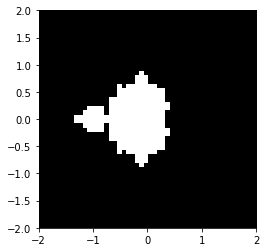

In [94]:
plt.imshow(ugh, cmap='gray',extent = [-2,2,-2,2])

# Question 5

In [119]:
print("Please enter the value for a")
a = float(input())
print("Please enter the value for b")
b = float(input())
print("Please enter the value for c")
c = float(input())


x1 = (-b+np.sqrt(b**2-4*a*c))/(2*a)
x2 = (-b-np.sqrt(b**2-4*a*c))/(2*a)
print(f'The two roots are : x1 = {x1} and x2 = {x2}')

Please enter the value for a
1
Please enter the value for b
1
Please enter the value for c
1
The two roots are : x1 = nan and x2 = nan


<ipython-input-119-b6523f0ef580>:9: RuntimeWarning: invalid value encountered in sqrt
  x1 = (-b+np.sqrt(b**2-4*a*c))/(2*a)
<ipython-input-119-b6523f0ef580>:10: RuntimeWarning: invalid value encountered in sqrt
  x2 = (-b-np.sqrt(b**2-4*a*c))/(2*a)


In [116]:
x3 = 2*c/(-b-np.sqrt(b**2-4*a*c))
x4 = 2*c/(-b+np.sqrt(b**2-4*a*c))

print(f'The two roots are : x3 = {x3} and x4 = {x4}')

The two roots are : x3 = -1.000000000001e-06 and x4 = -1000010.5755125057


#The problem is that when subtracting numbers, the precision of floating-point representation is reduced because the computer can only store a finite number of digits (typically 16). Subtraction between close numbers can lead to significant accuracy loss

In [121]:
def quadratic(a, b, c):
    discriminant = b**2 - 4*a*c
    
    # Check if the discriminant is negative, which means complex roots
    if discriminant < 0:
        real_part = -b / (2*a)
        imaginary_part = np.sqrt(-discriminant) / (2*a)
        return (complex(real_part, imaginary_part), complex(real_part, -imaginary_part))
    
   
    sqrt_discriminant = np.sqrt(discriminant)
    
    if b >= 0:
        root1 = (-b - sqrt_discriminant) / (2*a)
        root2 = (2*c) / (-b - sqrt_discriminant)  # Using an alternate form
    else:
        root1 = (-b + sqrt_discriminant) / (2*a)
        root2 = (2*c) / (-b + sqrt_discriminant)  # Using an alternate form
    
    return (root1, root2)




root1, root2 = quadratic_roots(0.001, 1000, 0.001)
print(f"The roots of the quadratic equation are: {root1} and {root2}")



The roots of the quadratic equation are: -999999.999999 and -1.000000000001e-06
